In [1]:
# Import necessary libraries
import torch
from torchvision import transforms
import random
import os
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Load the AGM dataset from the Hugging Face Hub
from datasets import load_dataset, load_from_disk

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# AGM dataset

In [2]:
REMOTE_REPO = "deep-plants/AGM"
DS_MEAN = [0.36797073900515825, 0.4997646251138504, 0.26248408302026566]
DS_STD = [0.18194517496156112, 0.20214607636275408, 0.17095115484747334]
IMG_SIZE = [120, 120]


In [3]:
# LOADING THIS DATASET FROM THE HUB MAY TAKE A FEW MINUTES (PHYSICAL SIZE: 3.5GB), 
# WE SUGGEST TO RUN THIS CELL ONLY ONCE AND THEN SAVE THE DATASET LOCALLY, AS SHOWN BELOW

# Load the dataset
dataset = load_dataset(REMOTE_REPO)

Generating train split: 100%|██████████| 972858/972858 [00:10<00:00, 96688.91 examples/s] 


In [4]:
# # Save the dataset locally
dataset.save_to_disk('/workdir/agm-plant-classification/data/AGM')
# # Load the dataset locally
# dataset = load_from_disk('/workdir/agm-plant-classification/data/AGM')

Saving the dataset (7/7 shards): 100%|██████████| 972858/972858 [00:18<00:00, 53609.98 examples/s]


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 972858
    })
})
Number of classes: 18
Number of samples: 972858
Class names: ['zx1', 'wh7', 'm1b', 'tu3', 'bz', 'rx3', 'ida', 'bx', 'zx3', 'm1a', 'by', 'tu2', 'tu1', 'y2', 'j1', 'y1', 'tu4', 'idb']


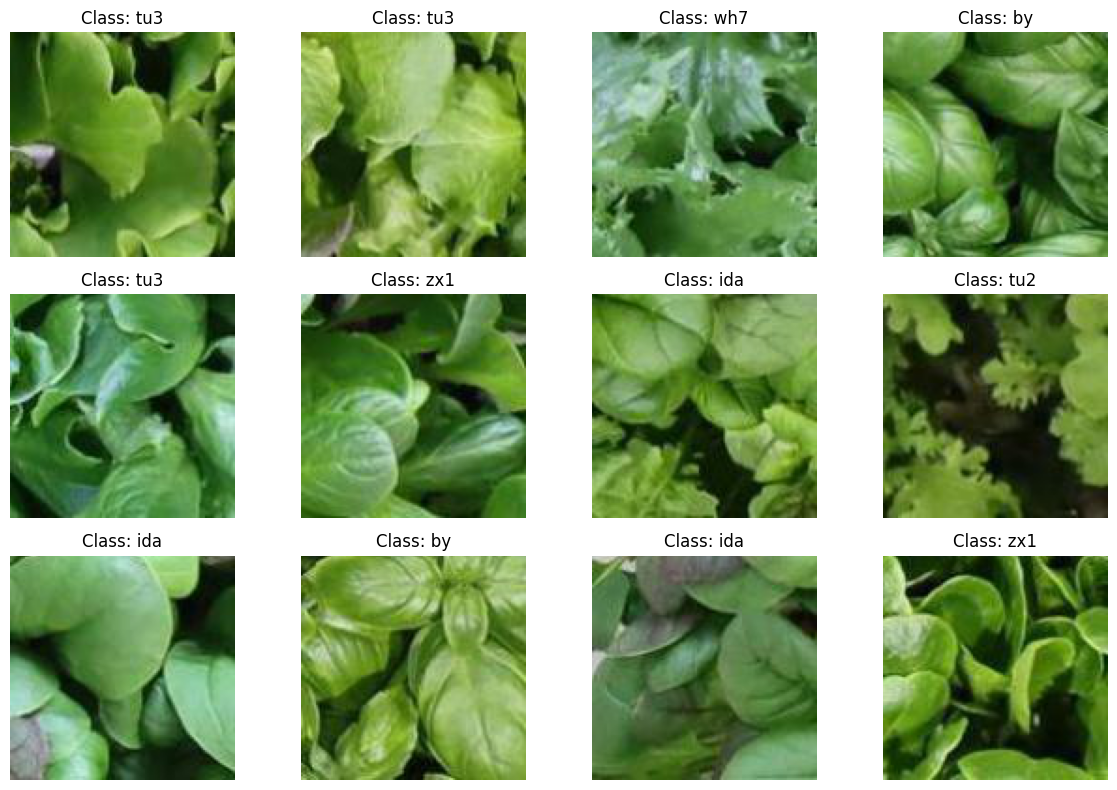

In [5]:
print(dataset)

# Get the labels from the training split
train_labels = dataset["train"]["label"]
# Calculate the number of unique classes (num_classes)
num_classes = len(set(train_labels))
# Calculate the number of samples in the training split (num_samples)
num_samples = len(train_labels)
# Get the class names by finding unique labels in the training split
class_names = list(set(train_labels))

# Print the extracted statistics
print(f"Number of classes: {num_classes}")
print(f"Number of samples: {num_samples}")
print(f"Class names: {class_names}")

# Display a grid of sample images with labels
num_samples_to_display = 12  # Adjust the number as needed
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i in range(num_samples_to_display):
    ax = axes[i // 4, i % 4]
    sample_idx = random.randint(0, num_samples - 1)
    sample_data = dataset['train'][sample_idx]
    image = sample_data['image']
    crop_type = sample_data['label']
    ax.imshow(image)
    ax.set_title(f"Class: {crop_type}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
transform = transforms.Compose([
    transforms.Resize(IMG_SIZE, interpolation=Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(DS_MEAN, DS_STD)
])
# Augmentations mapping function
def transform_ds(sample):
    sample['image'] = [transform(x) for x in sample['image']]
    return sample

dataset['train'] = dataset['train'].class_encode_column("label")
dataset = dataset.with_transform(transform_ds)
splits = dataset["train"].train_test_split(test_size=0.2, seed=42, stratify_by_column='label')
train_ds, val_ds = splits["train"], splits["test"]
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=True)

In [14]:
for i, batch in enumerate(train_dl):
    image, label = batch['image'], batch['label']
    print(i, image.shape, label.shape)
    if i == 1:
        break

0 torch.Size([32, 3, 120, 120]) torch.Size([32])
1 torch.Size([32, 3, 120, 120]) torch.Size([32])


# AGM<sub>HS</sub> dataset

In [9]:
REMOTE_REPO = "deep-plants/AGM_HS"
DS_MEAN = [0.36797073900515825, 0.4997646251138504, 0.26248408302026566]
DS_STD = [0.18194517496156112, 0.20214607636275408, 0.17095115484747334]
IMG_SIZE = [120, 120]


In [10]:
dataset = load_dataset(REMOTE_REPO)
# dataset.save_to_disk('agm_hs_dataset')
# dataset = load_from_disk('agm_hs_dataset')
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'mask', 'crop_type', 'label'],
        num_rows: 6127
    })
})


DatasetDict({
    train: Dataset({
        features: ['image', 'mask', 'crop_type', 'label'],
        num_rows: 6127
    })
})
Number of classes: 2
Number of samples: 6127
Class names: ['healthy', 'stressed']
Crop types 14 names: ['idb', 'ida', 'm1b', 'm1a', 'wh7', 'bx', 'by', 'y1', 'zx1', 'tu3', 'tu2', 'rx3', 'y2', 'tu1']


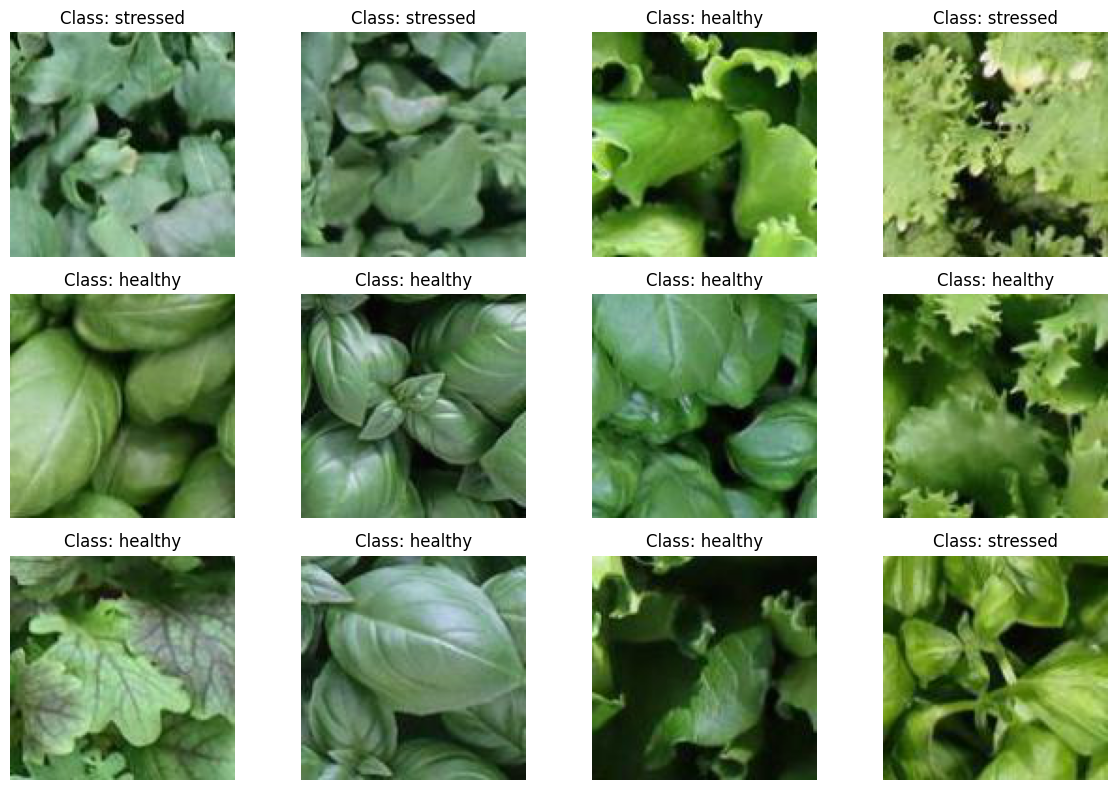

In [13]:
print(dataset)

# Get the labels from the training split
train_labels = dataset["train"]["label"]
crop_type = list(set(dataset["train"]["crop_type"]))
# Calculate the number of unique classes (num_classes)
num_classes = len(set(train_labels))
# Calculate the number of samples in the training split (num_samples)
num_samples = len(train_labels)
# Get the class names by finding unique labels in the training split
class_names = list(set(train_labels))

# Print the extracted statistics
print(f"Number of classes: {num_classes}")
print(f"Number of samples: {num_samples}")
print(f"Class names: {class_names}")
print(f"Crop types {(len(crop_type))} names: {crop_type}")

# Display a grid of sample images with labels
num_samples_to_display = 12  # Adjust the number as needed
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i in range(num_samples_to_display):
    ax = axes[i // 4, i % 4]
    sample_idx = random.randint(0, num_samples - 1)
    sample_data = dataset['train'][sample_idx]
    image = sample_data['image']
    crop_type = sample_data['label']
    ax.imshow(image)
    ax.set_title(f"Class: {crop_type}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [15]:
transform = transforms.Compose([
    transforms.Resize(IMG_SIZE, interpolation=Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(DS_MEAN, DS_STD)
])
transform_mask = transforms.Compose([
    transforms.Resize(IMG_SIZE, interpolation=Image.BICUBIC),
    transforms.ToTensor()
])
# Augmentations mapping function
def transform_ds(sample):
    sample['image'] = [transform(x) for x in sample['image']]
    sample['mask'] = [transform_mask(x) for x in sample['mask']]
    return sample

dataset['train'] = dataset['train'].class_encode_column("label")
dataset = dataset.with_transform(transform_ds)
splits = dataset["train"].train_test_split(test_size=0.2, seed=42, stratify_by_column='label')
train_ds, val_ds = splits["train"], splits["test"]
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=True)

In [16]:
for i, batch in enumerate(train_dl):
    image, label = batch['image'], batch['label']
    mask, crop_type = batch['mask'], batch['label']
    print(i, image.shape, label.shape, mask.shape, crop_type.shape)
    if i == 1:
        break

0 torch.Size([32, 3, 120, 120]) torch.Size([32])
0 torch.Size([32, 1, 120, 120]) torch.Size([32])
1 torch.Size([32, 3, 120, 120]) torch.Size([32])
1 torch.Size([32, 1, 120, 120]) torch.Size([32])
